In [23]:
#N1
import pandas as pd
df = pd.read_csv("Earthquakes_database.csv")
print(data.head())

df = df.drop(columns = "Azimuthal Gap")
print("Azimuthal Gap სვეტის წაშლის შემოდეგ:")
print(data.head())


       Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  1/2/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  1/4/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  1/5/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  1/8/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  1/9/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN   

In [24]:
#N2
distance_bins= [-float('inf'),50, 200, float('inf')]
distance_labels= ["Close","Moderate", "Far"]

data['Distance Category']= pd.cut(data['Horizontal Distance'], bins=distance_bins, labels=distance_labels, right=False)

print("ახალი კატეგორიით:")
print(data[['Horizontal Distance', 'Distance Category']].head())



ახალი კატეგორიით:
   Horizontal Distance Distance Category
0                  NaN               NaN
1                  NaN               NaN
2                  NaN               NaN
3                  NaN               NaN
4                  NaN               NaN


In [44]:
#N3
import pandas as pd

stacked_data = data.set_index(['Date', 'Time']).stack().reset_index(name='Value')
melted_data = data.melt(id_vars=['Date', 'Time'], value_vars=['Depth', 'Magnitude'],
                        var_name='Measurement', value_name='Value')

print("\nStacked Dataset:")
print(stacked_data.head())

print("\nMelted Dataset:")
print(melted_data.head())




Stacked Dataset:
       Date      Time    level_2       Value
0  1/2/1965  13:44:18   Latitude      19.246
1  1/2/1965  13:44:18  Longitude     145.616
2  1/2/1965  13:44:18       Type  Earthquake
3  1/2/1965  13:44:18      Depth       131.6
4  1/2/1965  13:44:18  Magnitude         6.0

Melted Dataset:
       Date      Time Measurement  Value
0  1/2/1965  13:44:18       Depth  131.6
1  1/4/1965  11:29:49       Depth   80.0
2  1/5/1965  18:05:58       Depth   20.0
3  1/8/1965  18:49:43       Depth   15.0
4  1/9/1965  13:32:50       Depth   15.0


<class 'pandas.core.frame.DataFrame'>
Index: 23409 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        23409 non-null  datetime64[ns]
 1   Time                        23409 non-null  object        
 2   Latitude                    23409 non-null  float64       
 3   Longitude                   23409 non-null  float64       
 4   Type                        23409 non-null  object        
 5   Depth                       23409 non-null  float64       
 6   Depth Error                 4460 non-null   float64       
 7   Depth Seismic Stations      7096 non-null   float64       
 8   Magnitude                   23409 non-null  float64       
 9   Magnitude Type              23406 non-null  object        
 10  Magnitude Error             327 non-null    float64       
 11  Magnitude Seismic Stations  2564 non-null   float64       


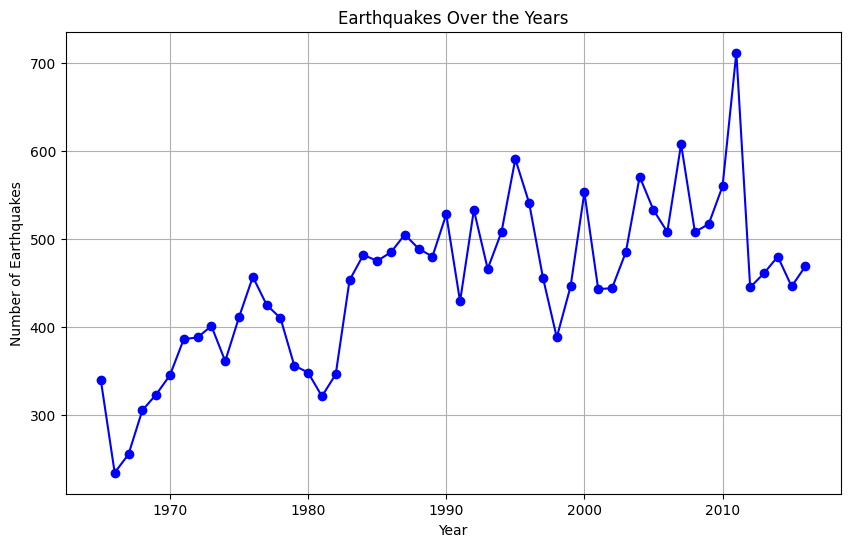

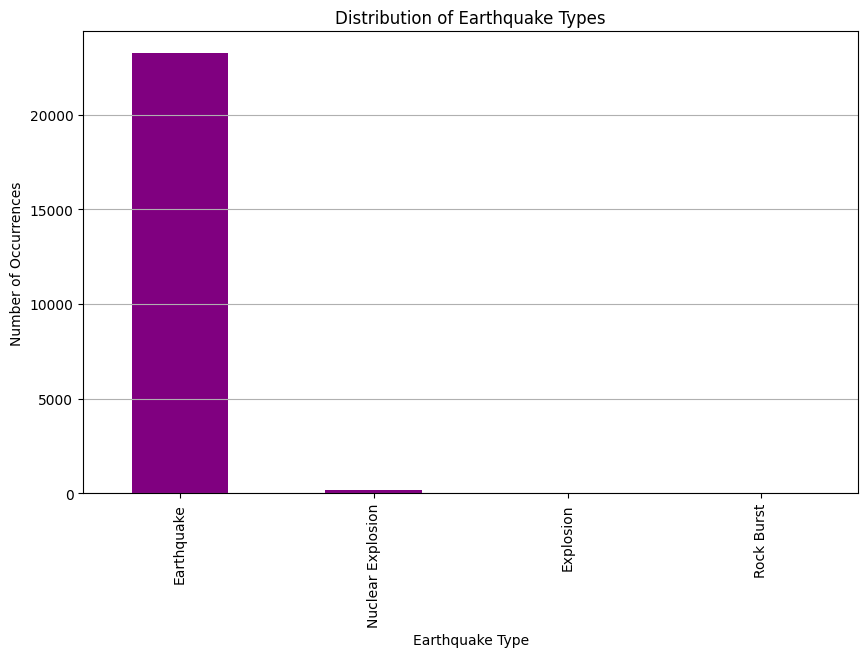

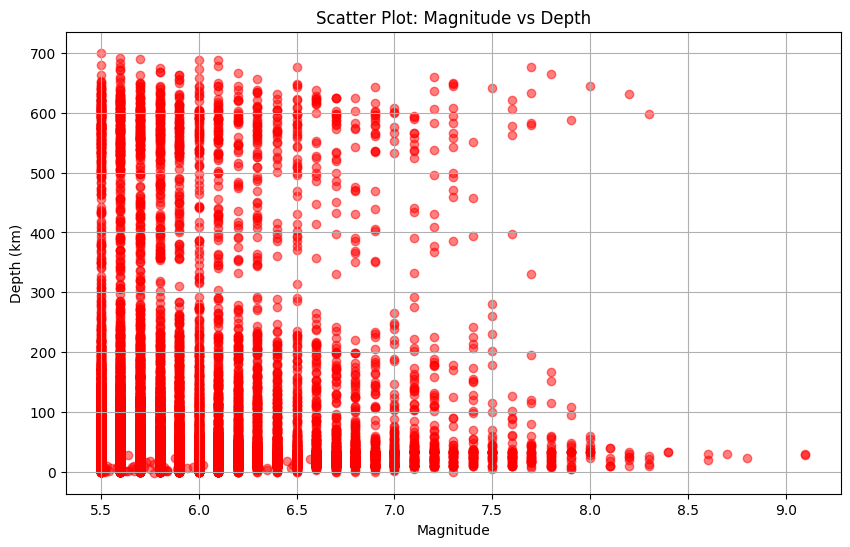

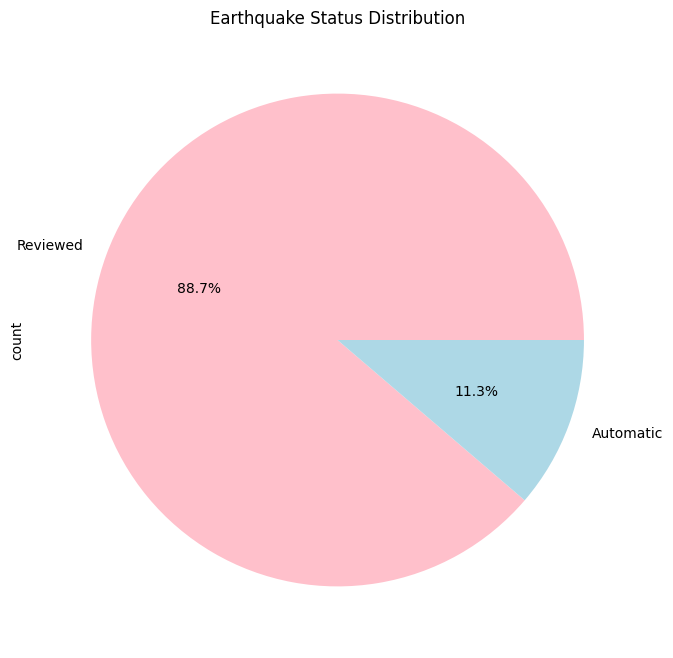

In [47]:
earthquake_data['date'] = pd.to_datetime(earthquake_data['date'], errors='coerce')
earthquake_data = earthquake_data.dropna(subset=['date'])
print(earthquake_data.info())

earthquake_data['Year'] = earthquake_data['date'].dt.year
print(earthquake_data.head())

# line chart
plt.figure(figsize=(10, 6))
earthquake_data.groupby('year').size().plot(kind='line', marker='o', color='blue')
plt.title('Earthquakes over the years')
plt.xlabel('year')
plt.ylabel('Number of earthquakes')
plt.grid(True)
plt.show()

# bar chart
plt.figure(figsize=(10, 6))
earthquake_data['type'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of earthquake types')
plt.xlabel('Earthquake type')
plt.ylabel('Number of occurrences')
plt.grid(axis='y')
plt.show()

# scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(earthquake_data['Magnitude'], earthquake_data['Depth'], color='red', alpha=0.5)
plt.title('Scatter Plot: Magnitude vs Depth')
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.grid(True)
plt.show()

# pie chart
plt.figure(figsize=(8, 8))
earthquake_data['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Earthquake status distribution')
plt.show()